#**Assignment 20.1 Initial Report and Exploratory Data analysis (EDA)**

##**Predicting Severity 1 (Reboot and Crash) Incidents Using Machine Learning on Severity 2 Telemetry from Cloud DataCenter Nodes**
###Pablo Rivera  paul.rivera.w@gmail.com

##**Context:**
The world’s largest cloud providers continuously roll out new hardware and software technologies—ranging from the latest CPUs and GPUs to advanced networking, storage enhancements, and updated software versions—to compete on efficiency and security. These innovations are integrated into high-capacity servers known as nodes. Typically, 20 nodes are housed within a rack, and 20 racks make up a cluster. Clusters serve as the basic modular units that are deployed into data centers worldwide.



In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Berkeley/PROJECT/Test')

Mounted at /content/drive


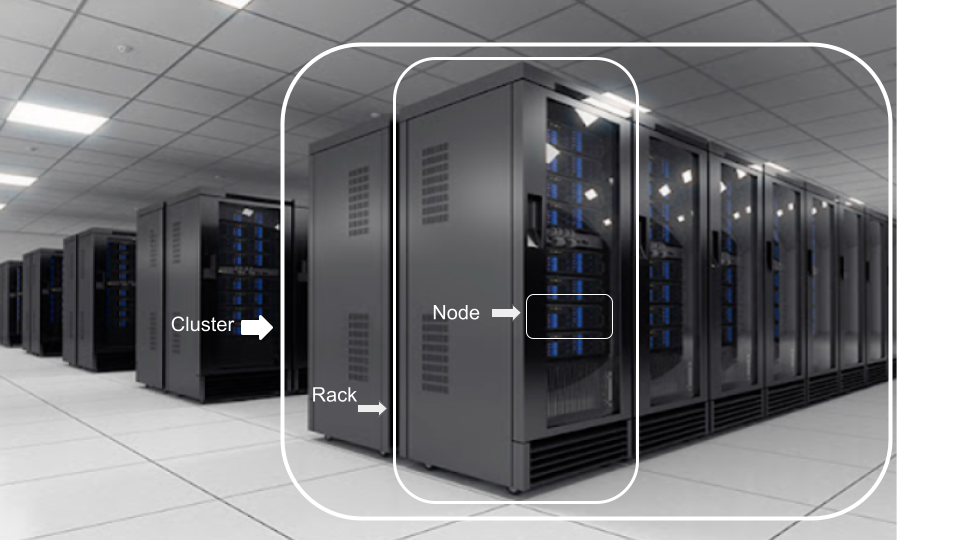

In [3]:
from IPython.display import Image, display
display(Image('NodeRack.png'))


Despite rigorous pre-deployment testing, these cutting -edge nodes frequently experience operational issues. Critical failures are categorized as Severity 1 (Sev1) incidents—such as system crashes or unexpected reboots— while Severity 2 (Sev2) events indicate degraded performance or functionality. Second-by-second telemetry data on Sev1 and Sev2 events is collected from every node, in every rack, across every data center globally, providing a rich dataset for monitoring, analysis, and predictive modeling.

##**Overview**
The purpose of this project is to develop a machine learning model capable of predicting whether a Severity 2 (Sev2) incident is likely to escalate into a Severity 1 (Sev1) incident within a specific node and time window. By leveraging detailed telemetry data colected across global data centers, the model aims to identify early warning signals and enable proactive mitigation strategies, ultimately improving system reliability and reducing downtime.


### **Disclaimer**:
The dataset used in this project has been anonymized to protect sensitive infrastructure and organizational information. All identifiers, including Node IDs, Cluster names, and service references, have been altered or generalized to prevent traceability to real systems or entities. This analysis is for research purposes only and does not reflect any specific real-world infrastructure.


##**Deliverables**
1. Exploratory data analysis (EDA) to develop an
2. Initial report including a baseline to refine the model



# **1 EDA**
## 1.1 Data Source
The data comes from one of the largest Cloud Provider internal telemetry systems that feed large databases with second to second status of every node in every clusters.  Initially I have 50 clusters that were deployed recently that have a blend of new CPU, new Storage a new Networking capabilities to offer more speed to run new AI workloads.  

I'm not able to disclose internal data, I had to change names to protect the confidentiality. However I can provide Data description with the original names masked behind ficticious names as follows:


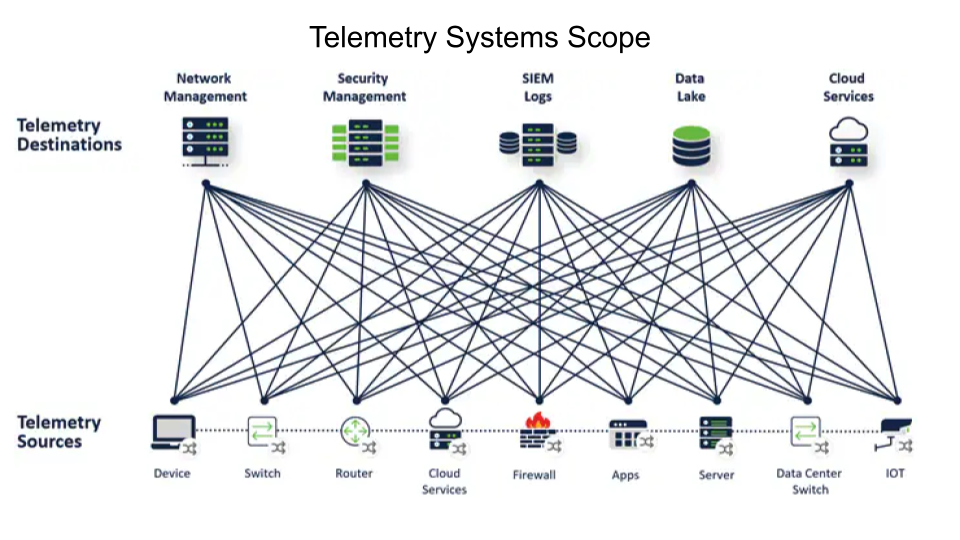

In [4]:
display(Image('Telemetry.png'))

In [ ]:
import pandas as pd
Telemetry = pd.read_csv('Sev1Telemetry.csv')

In [ ]:
Telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30102 entries, 0 to 30101
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PreciseTimeStamp  30102 non-null  object
 1   ClusterId         30102 non-null  object
 2   NodeId            30102 non-null  object
 3   RCALevel1         30102 non-null  object
 4   RCALevel2         30102 non-null  object
 5   EscalateToTeam    29140 non-null  object
 6   Scenario          30102 non-null  object
 7   ResourceType      30102 non-null  object
 8   ServiceName       30102 non-null  object
dtypes: object(9)
memory usage: 2.1+ MB


## 1.1.1 Data Structure

 1. PreciseTimeStamp : Time when the event happened
 2. ClusterId        : Name of the Cluster
 3. NodeId          : Unique Identifier of the node
 4. RCALevel1       : Root Cause Level 1 causing the incident
 5. RCALevel2       : Root Cause Level 2 causing the incident
 6. EscalateToTeam  : Name of the Team should be triaging the incident
 7. Scenario        : Active scenario when the incident happened
 8. ResourceType    : Type of compute resource involved in the incident
 9. ServiceName     : Name of The Service involved in the incident

In [ ]:
Telemetry.shape

(30102, 9)

In [ ]:
Telemetry.columns

Index(['PreciseTimeStamp', 'ClusterId', 'NodeId', 'RCALevel1', 'RCALevel2',
       'EscalateToTeam', 'Scenario', 'ResourceType', 'ServiceName'],
      dtype='object')

In [ ]:
Telemetry.describe()

,PreciseTimeStamp,ClusterId,NodeId,RCALevel1,RCALevel2,EscalateToTeam,Scenario,ResourceType,ServiceName
count,30102,30102,30102,30102,30102,29140,30102,30102,30102
unique,28686,5,1760,14,247,82,35,3,35
top,2024-12-31 16:26:39.5650,LyraCore0052,85398d34-8e9e-3163-366b-1be761550000,ContainerFault,ContainerFaultCode_10005_NSRaised_RetriesFaile...,SkyBlue Host Storage\StorageClient,ContainerFaultRCA,Container,ContainerFaultRCATreeWalkerService
freq,4,15556,1386,18287,7360,10916,7604,20106,7604


In [ ]:
Telemetry.head()

,PreciseTimeStamp,ClusterId,NodeId,RCALevel1,RCALevel2,EscalateToTeam,Scenario,ResourceType,ServiceName
0,2024-11-23 02:34:54.9620,OrionNode0073,b7eeeace-3d61-b49a-fae8-468835224078,HITriage,Needs_Triage,OneSkyBlueFleet Node\APlat_AnvilLowSev,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService
1,2024-11-23 21:48:15.5950,OrionNode0073,b7eeeace-3d61-b49a-fae8-468835224078,SoCReboot,BehaviorExpected_NonProduction,NeedsTriage,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService
2,2024-11-25 10:38:01.4550,DracoUnit0056,0e0cd22c-bd83-7498-ff68-b8a9a037d46a,SoCReboot_SoCHeartbeat,HeartBeatLoss_Log_Loss,NeedsTriage,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService
3,2024-11-25 10:48:04.8990,DracoUnit0056,0e0cd22c-bd83-7498-ff68-b8a9a037d46a,SoCReboot_SoCHeartbeat,HeartBeatLoss_Log_Loss,NeedsTriage,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService
4,2024-11-25 14:33:04.0390,DracoUnit0056,0e0cd22c-bd83-7498-ff68-b8a9a037d46a,SoCReboot_SoCHeartbeat,UnhealthyNode_HeartBeatLoss_Log_Loss,NeedsTriage,HostRCA_Cold,Node,HostRCA_ColdTreeWalkerService


## 1.2 Investigation for missing or problematic data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
def check_missing_data(df):
    missing_summary = df.isnull().sum()
    missing_percent = (missing_summary / len(df)) * 100
    return pd.DataFrame({"Missing Values in the file Telemetry.csv -> ": missing_summary, "%": missing_percent})
missing_data = check_missing_data(Telemetry)
print("\n summary missing values:")
print(missing_data)


 summary missing values:
                  Missing Values in the file Telemetry.csv ->          %
PreciseTimeStamp                                             0  0.000000
ClusterId                                                    0  0.000000
NodeId                                                       0  0.000000
RCALevel1                                                    0  0.000000
RCALevel2                                                    0  0.000000
EscalateToTeam                                             962  3.195801
Scenario                                                     0  0.000000
ResourceType                                                 0  0.000000
ServiceName                                                  0  0.000000


Question: Does 'EscalateToTeam' have a correlation with prediction we need to do ?, My Approach to predict if the next incident is going to be a Sev1 is looking into the Root Cause or RCALevel1 or Level2,  so I think we can drop the entire column

In [ ]:
# Looking for any duplicated rows in the data set ...
duplicate_rows = Telemetry.duplicated().sum()
print(f"\n my duplicated rows: {duplicate_rows}")



 my duplicated rows: 1325


That is unexpected since I have TimeStamp at milisec level

In [ ]:
# Show all duplicated rows
duplicated_rows_df = Telemetry[Telemetry.duplicated()]
duplicated_rows_df.head()

,PreciseTimeStamp,ClusterId,NodeId,RCALevel1,RCALevel2,EscalateToTeam,Scenario,ResourceType,ServiceName
29,2024-12-06 17:47:27.9700,DracoUnit0056,0e0cd22c-bd83-7498-ff68-b8a9a037d46a,SoCReboot_SoCHeartbeat,HeartBeatLoss_Log_Loss,NeedsTriage,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService
40,2024-12-10 16:58:50.0550,DracoUnit0056,8c027b08-9344-abbd-c226-e118271d5955,ContainerFault,ContainerFaultCode_10005_NSRaised_RetriesFaile...,SkyBlue Host Storage\StorageClient,ContainerRCA,Container,ContainerRCATreeWalkerService
64,2024-12-13 21:49:21.0610,DracoUnit0056,d52bd822-d4d7-0ec7-d005-7b902fdd8a77,HITriage,Faulted_By_External_Entity,OneSkyBlueFleet node-OneSkyBluehost-agent-sev-3-4,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService
69,2024-12-14 04:19:56.2620,DracoUnit0056,8c027b08-9344-abbd-c226-e118271d5955,ContainerFault,ContainerFaultCode_10005_NSRaised_RetriesFaile...,SkyBlue Host Storage\StorageClient,ContainerRCA,Container,ContainerRCATreeWalkerService
73,2024-12-14 05:48:27.1000,DracoUnit0056,0cbe0cf5-3506-2e9d-c5a8-48fafd06a958,HITriage,Faulted_By_External_Entity,OneSkyBlueFleet node-OneSkyBluehost-agent-sev-3-4,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService


to make sure ..

In [ ]:
# Identify all duplicated rows, including their first occurrences
all_duplicated_rows = Telemetry[Telemetry.duplicated(keep=False)]

# Sort the DataFrame to bring duplicated rows together
all_duplicated_rows_sorted = all_duplicated_rows.sort_values(by=list(all_duplicated_rows.columns))

# Display the sorted duplicated rows
print("\nAll duplicated rows, sorted:")
display(all_duplicated_rows_sorted)


All duplicated rows, sorted:


,PreciseTimeStamp,ClusterId,NodeId,RCALevel1,RCALevel2,EscalateToTeam,Scenario,ResourceType,ServiceName
28,2024-12-06 17:47:27.9700,DracoUnit0056,0e0cd22c-bd83-7498-ff68-b8a9a037d46a,SoCReboot_SoCHeartbeat,HeartBeatLoss_Log_Loss,NeedsTriage,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService
29,2024-12-06 17:47:27.9700,DracoUnit0056,0e0cd22c-bd83-7498-ff68-b8a9a037d46a,SoCReboot_SoCHeartbeat,HeartBeatLoss_Log_Loss,NeedsTriage,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService
39,2024-12-10 16:58:50.0550,DracoUnit0056,8c027b08-9344-abbd-c226-e118271d5955,ContainerFault,ContainerFaultCode_10005_NSRaised_RetriesFaile...,SkyBlue Host Storage\StorageClient,ContainerRCA,Container,ContainerRCATreeWalkerService
40,2024-12-10 16:58:50.0550,DracoUnit0056,8c027b08-9344-abbd-c226-e118271d5955,ContainerFault,ContainerFaultCode_10005_NSRaised_RetriesFaile...,SkyBlue Host Storage\StorageClient,ContainerRCA,Container,ContainerRCATreeWalkerService
63,2024-12-13 21:49:21.0610,DracoUnit0056,d52bd822-d4d7-0ec7-d005-7b902fdd8a77,HITriage,Faulted_By_External_Entity,OneSkyBlueFleet node-OneSkyBluehost-agent-sev-3-4,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService
...,...,...,...,...,...,...,...,...,...
30039,2025-05-20 01:07:25.3860,OrionNode0073,054ea7cd-0174-ba5b-5b6b-db828d96056a,ContainerFault,ContainerFaultCode_80001_NodeRecovery,XStore_Triage,ContainerRCA,Container,ContainerRCATreeWalkerService
30067,2025-05-20 07:26:00.6260,OrionNode0073,1325748e-e201-57a1-09f1-18340246054f,TDPR,VTL2_REQUEST_ERROR_unknown_failure,RedOS\Hyper-V SME,ContainerCreateStartRCA_Hot,Container,ContainerCreateStartRCAEvery20Min_HotTreeWalke...
30068,2025-05-20 07:26:00.6260,OrionNode0073,1325748e-e201-57a1-09f1-18340246054f,TDPR,VTL2_REQUEST_ERROR_unknown_failure,RedOS\Hyper-V SME,ContainerCreateStartRCA_Hot,Container,ContainerCreateStartRCAEvery20Min_HotTreeWalke...
30092,2025-05-20 13:33:30.8690,PegasusSys035,31820953-1ed8-0493-fb73-91216a5f29fa,HITriage,Agent_Enter_Faulted_Restart_Agent_RehydrationF...,SkyBlue Host Storage\StorageClient,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService


Is was real dup. I have to remove them

In [ ]:
# Remove duplicate rows, keeping the first occurrence
Telemetry_cleaned = Telemetry.drop_duplicates()

# Verify the number of rows after removing duplicates
print(f"\nNumber of rows after removing duplicates: {Telemetry_cleaned.shape[0]}")

duplicate_rows_after_drop = Telemetry_cleaned.duplicated().sum()
print(f"Number of duplicate rows in cleaned DataFrame: {duplicate_rows_after_drop}")


Number of rows after removing duplicates: 28777
Number of duplicate rows in cleaned DataFrame: 0


also I have to drop the column EscalateToTeam

In [ ]:
# Drop the 'EscalateToTeam' column
Telemetry_cleaned = Telemetry_cleaned.drop('EscalateToTeam', axis=1)

# Verify the columns remaining in the DataFrame
print("\nColumns after dropping 'EscalateToTeam':")
print(Telemetry_cleaned.columns)


Columns after dropping 'EscalateToTeam':
Index(['PreciseTimeStamp', 'ClusterId', 'NodeId', 'RCALevel1', 'RCALevel2',
       'Scenario', 'ResourceType', 'ServiceName'],
      dtype='object')


## 1.3 Checking unique values

In [ ]:
# issues like unexpected or inconsistent categories
def check_unique_values(df):
    unique_summary = {col: df[col].unique() for col in df.columns if df[col].dtype == 'object'}
    return unique_summary

unique_values = check_unique_values(Telemetry_cleaned)
print("\nUnique values in categorical columns:")
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values[:10]}")
    if len(values) > 10:
        print("... (and more)")
    print("-")


Unique values in categorical columns:
Column: PreciseTimeStamp
Unique Values: ['2024-11-23 02:34:54.9620' '2024-11-23 21:48:15.5950'
 '2024-11-25 10:38:01.4550' '2024-11-25 10:48:04.8990'
 '2024-11-25 14:33:04.0390' '2024-11-25 14:33:31.3360'
 '2024-11-25 14:44:28.8830' '2024-11-25 14:44:59.0910'
 '2024-11-25 14:53:25.0950' '2024-11-25 14:53:54.1470']
... (and more)
-
Column: ClusterId
Unique Values: ['OrionNode0073' 'DracoUnit0056' 'PegasusSys035' 'VelaGrid00015'
 'LyraCore0052']
-
Column: NodeId
Unique Values: ['b7eeeace-3d61-b49a-fae8-468835224078'
 '0e0cd22c-bd83-7498-ff68-b8a9a037d46a'
 'a4381ee8-4d0a-2e62-2902-5c06556e0032'
 '9c27b66a-7ed9-2523-ac60-f89d1d32ad06'
 '348341c8-bd18-3d68-4314-b4817839535c'
 'e11b906f-1785-d5b2-4276-e1de7c0ca147'
 '86c8afd4-a1fe-9918-10b7-82e1ab86a4cb'
 'fcb61b21-0288-fd66-bcee-f0b528b67a32'
 '4087f770-3320-761a-782b-deb5f84844e6'
 '651ca422-2376-65c5-2013-182a54314620']
... (and more)
-
Column: RCALevel1
Unique Values: ['HITriage' 'SoCReboot' 'SoCRe

Is ok NodeId is a unique identifier.  Same for TimeStamp

In [ ]:
def check_numerical_anomalies(df):
    anomalies = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        if (df[col] < 0).any():
            anomalies[col] = "Contains negative values"
        elif df[col].isnull().all():
            anomalies[col] = "All values are missing"
    return anomalies

numerical_anomalies = check_numerical_anomalies(Telemetry_cleaned)
print("\nNumerical column anomalies:")

if numerical_anomalies:
  for col, issue in numerical_anomalies.items():
    print(f"{col}: {issue}")
else:
  print("No anomalies found.")



Numerical column anomalies:
No anomalies found.


final summary:

In [ ]:
print("\nDataset shape -> :", Telemetry_cleaned.shape)
print("-- Column data types :")
print(Telemetry_cleaned.dtypes)


Dataset shape -> : (28777, 8)
-- Column data types :
PreciseTimeStamp    object
ClusterId           object
NodeId              object
RCALevel1           object
RCALevel2           object
Scenario            object
ResourceType        object
ServiceName         object
dtype: object


need Convert PreciseTimeStamp to real Date format since I need to find Sev1 wiht previous Sev1

In [ ]:
Telemetry_cleaned['PreciseTimeStamp'] = pd.to_datetime(Telemetry_cleaned['PreciseTimeStamp'])

In [ ]:
print("\nDataset shape -> :", Telemetry_cleaned.shape)
print("-- Column data types :")
print(Telemetry_cleaned.dtypes)


Dataset shape -> : (28777, 8)
-- Column data types :
PreciseTimeStamp    datetime64[ns]
ClusterId                   object
NodeId                      object
RCALevel1                   object
RCALevel2                   object
Scenario                    object
ResourceType                object
ServiceName                 object
dtype: object


## 1.4 Feature Engineering

I need to analyze the RCALevel1 and RCALevel2 to identify which one are Sev1 and witch ones are Sev2

In [ ]:
unique_values = Telemetry_cleaned['RCALevel1'].unique()
print("\nUnique values in 'RCALevel1' column:")
print(unique_values)


Unique values in 'RCALevel1' column:
['HITriage' 'SoCReboot' 'SoCReboot_SoCHeartbeat' 'NodeFault'
 'HardwareFault' 'ContainerFault' 'SoCStuckInMOS' 'SocRepair_SoCHeartbeat'
 'HostOSCrash' 'TDPR' 'Unknown' 'OaasMitigation' 'SoCRepair'
 'ConnectivityIssue']


In [ ]:
unique_values = Telemetry_cleaned['RCALevel2'].unique()
print("\nUnique values in 'RCALevel2' column:")
print(unique_values)


Unique values in 'RCALevel2' column:
['Needs_Triage' 'BehaviorExpected_NonProduction' 'HeartBeatLoss_Log_Loss'
 'UnhealthyNode_HeartBeatLoss_Log_Loss' 'UnhealthyNode_PowerState_False'
 'NodeFault : SuspiciousPowerConsumption' 'SuspiciousPowerConsumption'
 'SoC_Kernel_Crash' 'Manual_Repair_Warm_Reboot'
 '{pCIe Correctable Error, FPGA}'
 'UnhealthyNode_Device_Switch_Port_NotConnected'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0xc1530027_VMAL_E_UNEXPECTED_MFND_DISK_NOT_FOUND_Event__DiskAbstractionLayer::DirectDiskManager::GetAssignableMFNDDevices_FAILED'
 'Faulted_By_External_Entity'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0x8007045d_HRESULT_FROM_WIN32(ERROR_IO_DEVICE)___VmAbstractionLayer::DiskMountStrategyMfnd::UpdateDiskSettings_FAILED'
 'pCIe Correctable Error'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0x8007045d_HRESULT_FROM_WIN32(ERROR_IO_DEVICE)___VmAbstractionLayer::DalDllClient::CreateCacheFromMfnd_FAILED'

after a technical analysis and crosscheking with other internal private databases I'm not able to disclose it.  I got a list of RCALevel2 that are Sev1, when that RCALevel2 is raised is always a Sev1. RCALevel1 is not correlated

In [ ]:
sev1_df = pd.read_csv('Sev1.csv')
sev1_values = sev1_df['oldSev1'].tolist()
Telemetry_cleaned['Severity'] = Telemetry_cleaned['RCALevel2'].apply(lambda x: 'Sev1' if x in sev1_values else 'Sev2')
Telemetry_cleaned.to_csv('TelemetrySev1.csv',index=False)

In [ ]:
severity_counts = Telemetry_cleaned['Severity'].value_counts()
print(severity_counts)

Severity
Sev1    15810
Sev2    12967
Name: count, dtype: int64


In [ ]:
Telemetry = pd.read_csv('TelemetrySev1.csv')
Sev1 = Telemetry[Telemetry['Severity'] == 'Sev1']
Sev2 = Telemetry[Telemetry['Severity'] == 'Sev2']
Sev1_list = Sev1[Sev1['Severity']=='Sev1']
RCAL2 = Sev1_list['RCALevel2'].unique()
Num_RCAL2 = len(RCAL2)
print(Num_RCAL2)
print(RCAL2)

62
['UnhealthyNode_PowerState_False' 'NodeFault : SuspiciousPowerConsumption'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0xc1530027_VMAL_E_UNEXPECTED_MFND_DISK_NOT_FOUND_Event__DiskAbstractionLayer::DirectDiskManager::GetAssignableMFNDDevices_FAILED'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0x8007045d_HRESULT_FROM_WIN32(ERROR_IO_DEVICE)___VmAbstractionLayer::DiskMountStrategyMfnd::UpdateDiskSettings_FAILED'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0x8007045d_HRESULT_FROM_WIN32(ERROR_IO_DEVICE)___VmAbstractionLayer::DalDllClient::CreateCacheFromMfnd_FAILED'
 '0x133_ISR_nt!DpxEndpointWrappedCall'
 'ContainerFaultCode_10005_NSRaised_RetriesFailed_CreateContainer_0xc153002e_ERROR_DISK_MISSING_A__DiskAbstractionLayer::DiskPreparer::IsDiskMissing_FAILED'
 'UNPROCESSED_FAILING_HR_0x8000ffff_ContainerFaultCode_10005_NSRaised_RetriesFailed_StartContainer_0x8000ffff_E_UNEXPECTED_Catastrophic__AgentStartContainerWorker_FAILE

In [ ]:
Severity_counts = Telemetry['Severity'].value_counts()
print(Severity_counts)

Severity
Sev1    15810
Sev2    12967
Name: count, dtype: int64


I think I could have more Sev1 than in reality happens, this could be caused because when the node get stuck in Sev1 the Telemetry continue transmitting the same incident for hours and days.They are not duplicated rows because the TimeStamp keeps changing.
I think I need to clear the data removing all those Sev1 cases. I can remove them creating a new dataset from the orginal group by NodeId, Severity, RCALevel2 and RCALevel1. For each group find the row with the maximum PreciseTimeStamp and return all the columns from the row that has the latest PreciseTimeStamp within each Group

In [ ]:
Telemetry = pd.read_csv('TelemetrySev1.csv')

# Group the DataFrame by the specified columns
grouped_data = Telemetry.groupby(['NodeId', 'Severity', 'RCALevel2', 'RCALevel1'])

# For each group, find the index of the row with the maximum PreciseTimeStamp
latest_incident_indices = grouped_data['PreciseTimeStamp'].idxmax()

# Use the indices to select the corresponding rows from the original DataFrame
latest_incidents_per_group = Telemetry.loc[latest_incident_indices]



In [ ]:
latest_incidents_per_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7151 entries, 21097 to 27456
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PreciseTimeStamp  7151 non-null   object
 1   ClusterId         7151 non-null   object
 2   NodeId            7151 non-null   object
 3   RCALevel1         7151 non-null   object
 4   RCALevel2         7151 non-null   object
 5   Scenario          7151 non-null   object
 6   ResourceType      7151 non-null   object
 7   ServiceName       7151 non-null   object
 8   Severity          7151 non-null   object
dtypes: object(9)
memory usage: 558.7+ KB


In [ ]:
latest_incidents_per_group.shape

(7151, 9)

In [ ]:
latest_incidents_per_group.describe()

,PreciseTimeStamp,ClusterId,NodeId,RCALevel1,RCALevel2,Scenario,ResourceType,ServiceName,Severity
count,7151,7151,7151,7151,7151,7151,7151,7151,7151
unique,7115,5,1760,14,247,32,3,32,2
top,2025-04-15 22:14:55.611,LyraCore0052,b8ce0991-ba2b-5ed3-fd39-975b47179800,SoCReboot,Manual_Repair_Warm_Reboot,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService,Sev2
freq,2,2448,20,1849,1183,2149,5156,2149,5982


In [ ]:
latest_incidents_per_group.head(10)

,PreciseTimeStamp,ClusterId,NodeId,RCALevel1,RCALevel2,Scenario,ResourceType,ServiceName,Severity
21097,2025-04-04 10:21:10.451,VelaGrid00015,00895fde-15ce-ba5f-e4fd-e659170dda40,SoCReboot,Manual_Repair_Warm_Reboot,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService,Sev2
15600,2025-02-08 15:31:15.398,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,ContainerFault,ContainerFaultCode_10005_NSRaised_RetriesFaile...,ContainerRCA,Container,ContainerRCATreeWalkerService,Sev1
22881,2025-04-15 22:14:55.954,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,SoCReboot,Manual_Repair_Warm_Reboot,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService,Sev2
3738,2025-01-11 17:46:51.241,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,HITriage,TipSession_Agent_Enter_Faulted_Restart_Agent_I...,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService,Sev2
15711,2025-02-10 05:32:05.914,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,HITriage,TipSession_RdAgent_KnownFunction_Failed_10005_...,HIRCA_Hot,Node,HIRCAEvery15mins_HotTreeWalkerService,Sev2
14714,2025-02-01 12:42:24.224,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,NodeFault,UnhealthyNode_OngoingTiPSessionWithActiveUser,HostRCA_Cold,Node,HostRCA_ColdTreeWalkerService,Sev2
16971,2025-02-27 18:33:35.223,LyraCore0052,00fbff33-67c8-7b98-7679-54a07b8b9b97,HostOSCrash,0x133_ISR_nt!KiTimerExpiration,HostRCA_Cold,Node,HostRCA_ColdTreeWalkerService,Sev1
627,2024-12-31 12:36:09.651,LyraCore0052,00fbff33-67c8-7b98-7679-54a07b8b9b97,SoCReboot,BehaviorExpected_NonProduction,SoCRebootRCA,Node,SoCRebootRCATreeWalkerService,Sev2
3915,2025-01-12 06:30:17.460,LyraCore0052,00fbff33-67c8-7b98-7679-54a07b8b9b97,NodeFault,CMNSUnresponsive_Inconclusive,CMNSUnresponsive,Node,CMNSUnresponsiveTreeWalkerService,Sev2
8904,2025-01-17 07:01:11.435,LyraCore0052,00fbff33-67c8-7b98-7679-54a07b8b9b97,ContainerFault,ContainerUnresponsive_NeedsTriage,ContainerUnresponsive,Container,ContainerUnresponsiveRCASchema_HotTreeWalkerSe...,Sev2


Re-ordering the columns for easy visualization:

In [ ]:
desired_column_order = [
    'PreciseTimeStamp',
    'ClusterId',
    'NodeId',
    'Severity',
    'RCALevel2',
    'RCALevel1',
    'ResourceType',
    'Scenario',
    'ServiceName'
]
# Reindex the DataFrame with the desired column order
latest_incidents_per_group_reordered = latest_incidents_per_group[desired_column_order]


In [ ]:
latest_incidents_per_group_reordered.head()

,PreciseTimeStamp,ClusterId,NodeId,Severity,RCALevel2,RCALevel1,ResourceType,Scenario,ServiceName
21097,2025-04-04 10:21:10.451,VelaGrid00015,00895fde-15ce-ba5f-e4fd-e659170dda40,Sev2,Manual_Repair_Warm_Reboot,SoCReboot,Node,SoCRebootRCA,SoCRebootRCATreeWalkerService
15600,2025-02-08 15:31:15.398,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...,ContainerFault,Container,ContainerRCA,ContainerRCATreeWalkerService
22881,2025-04-15 22:14:55.954,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,Sev2,Manual_Repair_Warm_Reboot,SoCReboot,Node,SoCRebootRCA,SoCRebootRCATreeWalkerService
3738,2025-01-11 17:46:51.241,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,Sev2,TipSession_Agent_Enter_Faulted_Restart_Agent_I...,HITriage,Node,HIRCA_Hot,HIRCAEvery15mins_HotTreeWalkerService
15711,2025-02-10 05:32:05.914,OrionNode0073,00d51c47-c769-5f7b-642b-ddfc5a172fee,Sev2,TipSession_RdAgent_KnownFunction_Failed_10005_...,HITriage,Node,HIRCA_Hot,HIRCAEvery15mins_HotTreeWalkerService


In [ ]:
# Save the resulting DataFrame to my new CSV file
latest_incidents_per_group_reordered.to_csv('TelemetrySev1GroupReordered.csv', index=False)

In [ ]:
latest_incidents_per_group_reordered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7151 entries, 21097 to 27456
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PreciseTimeStamp  7151 non-null   object
 1   ClusterId         7151 non-null   object
 2   NodeId            7151 non-null   object
 3   Severity          7151 non-null   object
 4   RCALevel2         7151 non-null   object
 5   RCALevel1         7151 non-null   object
 6   ResourceType      7151 non-null   object
 7   Scenario          7151 non-null   object
 8   ServiceName       7151 non-null   object
dtypes: object(9)
memory usage: 816.7+ KB


Since I want to predict if a node will escalate to Sev1, I need information before the event happens, ie, I need nodes with Sev1 and they  experienced Sev2 before.  Thats mean: I need to filter this data base with the following rules:
1. Remove all the nodes that only experienced Sev1 could be any number but only Sev1
2. identify nodes that had both Sev1 and preceding Sev2 and keep them, they hold the data required to train the model
3. keep all the nodes with only Sev2
4. Combine filtered dataset  

In [ ]:
# Removing the nodes that only experienced Sev1 but no Sev2
df = latest_incidents_per_group_reordered
nodes_to_filter_out = df.groupby('NodeId').filter(
    lambda x: ('Sev1' in x['Severity'].values) and ('Sev2' not in x['Severity'].values)
)['NodeId'].unique()

# Printing the count of nodes to be removed
print(f"Number of nodes with Sev1 but no Sev2 incidents to be removed: {len(nodes_to_filter_out)}")
print(nodes_to_filter_out)



Number of nodes with Sev1 but no Sev2 incidents to be removed: 18
['054f95cc-49ef-2838-ee8e-79e652f06476'
 '36b4fab8-57ed-305a-9073-0d2cd9e62cd2'
 '3b81c573-ef2b-f80f-9f04-b4f99bac9aba'
 '487596ce-cec1-8382-5c28-ed96a677f9ad'
 '4a58d68a-0e27-9c44-d50b-9ee636d032e1'
 '5187494e-e665-bb16-e522-fa67b459e1b7'
 '60baef9a-cc67-37f7-c2a0-d65e97623773'
 '618a1cad-a175-00eb-11d5-b6d7d712b222'
 '711b834d-a396-5b3d-210a-593db2b6c8c5'
 '899fb463-029a-7b7f-5af0-bb5cd9f2960c'
 '9bca7fb2-e00b-0199-a911-212706cb187c'
 'b2e398fe-471d-4945-ade1-a0fac83fd074'
 'cbd33ced-88e1-f4b7-d974-084bc93cd638'
 'd590148a-307b-66be-abd8-5562f7b27454'
 'e47eaf02-1fb8-92ab-aab7-8df4ca63e143'
 'eb3c3948-510d-1c5a-75e9-0f96576eb396'
 'f0891f1d-40a3-c5ac-bb1a-5d3a9451d2bc'
 'f2b8e7bd-f681-4703-4f9d-4d79acc1e58c']


Checked internally I'm not removing nothing relevant

In [ ]:
# Remove these nodes from the DataFrame
df_filtered = df[~df['NodeId'].isin(nodes_to_filter_out)]
print("Shape after removing nodes with Sev1 but no Sev2:", df_filtered.shape)

Shape after removing nodes with Sev1 but no Sev2: (7124, 9)


This is the most relevant part of the data: nodes they had a Sev1 but before the Sev1 they had 1 or more Sev2 before the Sev1

In [ ]:
# Identify nodes that had both Sev1 and a preceding Sev2
# Nodes that have at least one Sev1 and at least one Sev2
# where a Sev2 incident occurred before a Sev1 incident for that node.
def has_sev2_before_sev1(group):
    sev1_timestamps = group[group['Severity'] == 'Sev1']['PreciseTimeStamp']
    sev2_timestamps = group[group['Severity'] == 'Sev2']['PreciseTimeStamp']

    if sev1_timestamps.empty or sev2_timestamps.empty:
        # If either Sev1 or Sev2 is missing, this condition cannot be met
        return False

    # Check if for any Sev1 incident, there is a Sev2 incident with an earlier timestamp
    for sev1_ts in sev1_timestamps:
        if any(sev2_ts < sev1_ts for sev2_ts in sev2_timestamps):
            return True
    return False

nodes_with_sev2_before_sev1 = df_filtered.groupby('NodeId').filter(has_sev2_before_sev1)['NodeId'].unique()
print(f"Number of nodes with Sev2 preceding Sev1: {len(nodes_with_sev2_before_sev1)}")

Number of nodes with Sev2 preceding Sev1: 609


Checking to validate:  10 random nodes

In [ ]:
## Print 10 random samples of nodes matching the criteria
if len(nodes_with_sev2_before_sev1) > 0:
    import numpy as np
    # Select up to 10 random NodeIds from the list
    num_samples = min(10, len(nodes_with_sev2_before_sev1))
    random_nodes_sample = np.random.choice(nodes_with_sev2_before_sev1, size=num_samples, replace=False)

    print("\n--- Sample of 10 Random Nodes with Sev2 preceding Sev1 ---")
    for node_id in random_nodes_sample:
        print(f"\nNodeId: {node_id}")
        # Get the data for this specific node
        node_data = df_filtered[df_filtered['NodeId'] == node_id]
        # Sort by timestamp for easier viewing of sequence
        node_data_sorted = node_data.sort_values(by='PreciseTimeStamp')
        # Display only the relevant columns
        display(node_data_sorted[['PreciseTimeStamp', 'Severity', 'RCALevel2']])
    print("-----------------------------------------------------------\n")
else:
    print("\nNo nodes found with Sev2 preceding Sev1 criteria.")




--- Sample of 10 Random Nodes with Sev2 preceding Sev1 ---

NodeId: f1322c58-742a-b121-06b0-48914ec748e0


,PreciseTimeStamp,Severity,RCALevel2
26758,2025-05-03 14:10:55.598,Sev2,Vtl2_Crash_event_18590_0
26859,2025-05-04 05:23:08.506,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...



NodeId: 8fac48c6-1d10-5443-af84-d9cb4ed6c9a5


,PreciseTimeStamp,Severity,RCALevel2
15385,2025-02-06 19:28:51.675,Sev2,Blocked:ContainerWorkflowBlocked_UnachievableG...
24995,2025-04-24 07:52:36.924,Sev2,Vtl2_Crash_event_18590_0
25223,2025-04-25 15:48:39.827,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...
28747,2025-05-20 08:07:31.621,Sev2,VTL2_REQUEST_ERROR_unknown_failure
28755,2025-05-20 10:48:58.747,Sev1,VTL2_REQUEST_ERROR_unknown_failure_ContainerFa...



NodeId: 3f194212-6d06-35ba-3477-5792322cb868


,PreciseTimeStamp,Severity,RCALevel2
2702,2025-01-08 06:17:29.098,Sev2,HeartBeatLoss_Log_Loss
2734,2025-01-08 10:03:07.285,Sev2,Faulted_By_External_Entity
16787,2025-02-25 18:51:51.917,Sev2,TipSession_RdAgent_KnownFunction_Failed_10005_...
20158,2025-04-02 15:39:09.649,Sev2,Manual_Repair_Warm_Reboot
26467,2025-05-01 18:27:02.645,Sev2,Vtl2_Crash_event_18590_0
26631,2025-05-02 18:21:30.884,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...



NodeId: 982a9747-0bf9-d366-d972-7688992e7b6b


,PreciseTimeStamp,Severity,RCALevel2
15099,2025-02-04 22:25:25.585,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
15497,2025-02-07 18:14:35.961,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
28271,2025-05-16 14:06:20.512,Sev2,VTL2_REQUEST_ERROR_unknown_failure
28285,2025-05-16 16:30:38.749,Sev1,VTL2_REQUEST_ERROR_unknown_failure_ContainerFa...



NodeId: 4ffd6973-607b-ffc1-856c-688b48926206


,PreciseTimeStamp,Severity,RCALevel2
26388,2025-05-01 05:26:39.555,Sev2,Vtl2_Crash_event_18590_0
26587,2025-05-02 13:29:06.974,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...



NodeId: 6e172492-b675-8425-34e9-c8ac73b25cd2


,PreciseTimeStamp,Severity,RCALevel2
19289,2025-03-27 17:09:21.053,Sev2,VmStartTimedOutTriage_ContainerSuccessfullySta...
27404,2025-05-08 10:24:43.671,Sev2,Vtl2_Crash_event_18590_0
27521,2025-05-09 04:07:47.765,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...
27597,2025-05-09 18:13:24.533,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...



NodeId: 54b8ff8a-a3c6-a2b4-0093-3da910e7ef0e


,PreciseTimeStamp,Severity,RCALevel2
1255,2025-01-01 13:32:22.977,Sev2,BehaviorExpected_HostRepave
1795,2025-01-05 00:33:01.586,Sev2,UnhealthyNode_OngoingTiPSessionWithActiveUser
12071,2025-01-22 07:22:02.290,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
12181,2025-01-22 17:04:42.862,Sev2,Blocked:ContainerWorkflowBlocked_UnachievableG...
25546,2025-04-27 04:01:09.768,Sev2,VmStartTimedOutTriage_ContainerSuccessfullySta...
25591,2025-04-27 09:43:39.550,Sev2,VmStartTimedOutTriage_WindowsProvisioningFailure
28662,2025-05-19 16:19:47.600,Sev2,"Nic errors with EventId: 20 , Provider Name: m..."



NodeId: 09ff1054-bd0a-75f9-cfce-02c0eac6871d


,PreciseTimeStamp,Severity,RCALevel2
19274,2025-03-27 17:08:38.957,Sev2,VmStartTimedOutTriage_ContainerSuccessfullySta...
22020,2025-04-09 15:02:12.557,Sev2,This node was updated by an OAAS automation wi...
26917,2025-05-04 12:06:02.894,Sev2,Vtl2_Crash_event_18590_0
27036,2025-05-05 08:13:35.451,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...



NodeId: 469095da-74d7-e7ab-bcfa-cbc7ad65be45


,PreciseTimeStamp,Severity,RCALevel2
701,2024-12-31 13:31:10.605,Sev2,BehaviorExpected_NonProduction
13112,2025-01-24 09:46:26.692,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
13161,2025-01-24 16:27:05.551,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
15865,2025-02-12 00:01:44.901,Sev2,This node was updated by an OAAS automation wi...
19056,2025-03-22 00:19:02.757,Sev2,Manual_Repair_Warm_Reboot



NodeId: c87ad253-2221-7590-d2f3-fe947e70a405


,PreciseTimeStamp,Severity,RCALevel2
19443,2025-03-28 21:52:10.884,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
19456,2025-03-28 22:24:08.073,Sev2,ContainerFaultCode_10005_NSRaised_RetriesFaile...
19540,2025-03-29 06:41:07.577,Sev2,Vtl2_Crash_event_18590_0
19563,2025-03-29 16:19:01.753,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...


-----------------------------------------------------------



the filter is not perfect: Its allows Sev1(t-3) Sev2(t-2) Sev2(t-1) Sev1(t)

In [ ]:
# Filter individual Sev1 records that are not preceded by a Sev2 for the same NodeId
# This requires processing each node's records chronologically.
import numpy as np

def filter_unpreceded_sev1(group):
    # Ensure the group is sorted by timestamp
    group = group.sort_values(by='PreciseTimeStamp')

    # Initialize a list to store the rows to keep for this group
    rows_to_keep = []
    # Flag to track if a Sev2 has been encountered  within this node's history yet
    sev2_encountered = False

    for index, row in group.iterrows():
        if row['Severity'] == 'Sev2':
            # Always keep Sev2 incidents
            rows_to_keep.append(row)
            sev2_encountered = True # Mark that a Sev2 has now occurred
        elif row['Severity'] == 'Sev1':
            # Only keep Sev1 incidents if a Sev2 has been encountered *before* this Sev1 in the same node
            if sev2_encountered:
                rows_to_keep.append(row)
            # If a Sev2 has NOT been encountered yet, this Sev1 is removed
        else:
            # Keep other severity level ( in this case we have Sev2 but in next version I want to go further with Sev3 and component level) as they might be relevant context
            rows_to_keep.append(row)

    # Return the rows to keep as a DataFrame
    if rows_to_keep:
        return pd.DataFrame(rows_to_keep)
    else:
        return pd.DataFrame() # Return an empty DataFrame if no rows are kept

# Apply the filtering function to each group (NodeId)
print("\nApplying row-level filtering for Sev1 incidents not preceded by Sev2...")
df_filtered_by_sequence = df_filtered.groupby('NodeId').apply(filter_unpreceded_sev1).reset_index(drop=True)
print("Shape after filtering individual Sev1 records:", df_filtered_by_sequence.shape)


Applying row-level filtering for Sev1 incidents not preceded by Sev2...
Shape after filtering individual Sev1 records: (6924, 9)


<ipython-input-43-1bd6b7c9830a>:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered_by_sequence = df_filtered.groupby('NodeId').apply(filter_unpreceded_sev1).reset_index(drop=True)


In [ ]:
## Print 10 random samples of nodes matching the criteria
unique_nodes_ids_in_filtered_df = df_filtered_by_sequence[df_filtered_by_sequence['NodeId'].isin(nodes_with_sev2_before_sev1)]['NodeId'].unique()
if len(unique_nodes_ids_in_filtered_df) > 0:
    import numpy as np
    # Select up to 10 random NodeIds from the list
    num_samples = min(10, len(nodes_with_sev2_before_sev1))
    random_nodes_sample = np.random.choice(nodes_with_sev2_before_sev1, size=num_samples, replace=False)

    print("\n--- Sample of 10 Random Nodes with Sev2 preceding Sev1 ---")
    for node_id in random_nodes_sample:
        print(f"\nNodeId: {node_id}")
        # Get the data for this specific node
        node_data = df_filtered[df_filtered['NodeId'] == node_id]
        # Sort by timestamp for easier viewing of sequence
        node_data_sorted = node_data.sort_values(by='PreciseTimeStamp')
        # Display only the relevant columns
        display(node_data_sorted[['PreciseTimeStamp', 'Severity', 'RCALevel2']])
    print("-----------------------------------------------------------\n")
else:
    print("\nNo nodes found with Sev2 preceding Sev1 criteria.")



--- Sample of 10 Random Nodes with Sev2 preceding Sev1 ---

NodeId: fd3ef598-7377-073e-2560-2ef5df77e586


,PreciseTimeStamp,Severity,RCALevel2
13005,2025-01-24 06:48:45.446,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
13345,2025-01-25 03:46:22.380,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
14492,2025-01-30 20:21:29.103,Sev2,Blocked:ContainerWorkflowBlocked_UnachievableG...
14833,2025-02-03 13:20:24.452,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
15055,2025-02-04 18:03:09.680,Sev1,Agent_Enter_Faulted_Restart_Agent_RehydrationF...
15088,2025-02-04 21:16:43.475,Sev2,Agent_Enter_Faulted_Restart_Agent_RehydrationF...
15116,2025-02-04 23:18:20.634,Sev2,HeartBeatLoss_Log_Loss
15364,2025-02-06 16:02:48.339,Sev2,UnhealthyNode_Inconclusive_OrganicRecovery
21175,2025-04-04 18:12:33.205,Sev2,Manual_Repair_Warm_Reboot



NodeId: a0478252-953e-c21b-f51d-f7360bc7fe3d


,PreciseTimeStamp,Severity,RCALevel2
217,2024-12-20 18:01:53.678,Sev2,Faulted_By_External_Entity
4994,2025-01-13 18:23:28.467,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
7165,2025-01-15 10:45:55.004,Sev1,Agent_Enter_Faulted_Restart_Agent_RehydrationF...
7318,2025-01-15 14:01:00.785,Sev2,Agent_Enter_Faulted_Restart_Agent_RehydrationF...
7401,2025-01-15 16:04:14.006,Sev2,HeartBeatLoss_Log_Loss
21005,2025-04-03 15:53:45.234,Sev2,Manual_Repair_Warm_Reboot
28117,2025-05-15 05:07:29.033,Sev2,VTL2_REQUEST_ERROR_unknown_failure
28144,2025-05-15 09:44:45.815,Sev1,VTL2_REQUEST_ERROR_unknown_failure_ContainerFa...



NodeId: 45e2f7f1-300e-6dc0-4f99-bb48046e8990


,PreciseTimeStamp,Severity,RCALevel2
1100,2024-12-31 18:03:40.547,Sev2,BehaviorExpected_NonProduction
3310,2025-01-10 07:23:14.824,Sev2,UnhealthyNode_OngoingTiPSessionWithActiveUser
11007,2025-01-19 14:20:09.373,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
13569,2025-01-26 14:01:01.767,Sev2,Blocked:ContainerWorkflowBlocked_UnachievableG...
28762,2025-05-20 11:34:28.681,Sev2,"Nic errors with EventId: 20 , Provider Name: m..."



NodeId: 12c347d3-581e-d338-2b1d-c753d7dbbd12


,PreciseTimeStamp,Severity,RCALevel2
9241,2025-01-17 18:32:39.272,Sev2,TipSession_Faulted_By_External_Entity
9819,2025-01-18 08:49:27.614,Sev2,BehaviorExpected_NonProduction
13527,2025-01-26 05:47:36.032,Sev2,Faulted_By_External_Entity
14060,2025-01-28 14:01:49.695,Sev2,TipSession_Needs_Triage
14075,2025-01-28 17:52:21.112,Sev2,UnhealthyNode_OngoingTiPSessionWithActiveUser
14138,2025-01-29 02:52:45.686,Sev2,HeartBeatLoss_Log_Loss
22026,2025-04-09 16:43:17.080,Sev2,Vtl2_Crash_event_18590_0
22076,2025-04-10 04:22:23.101,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...



NodeId: 1e8dd0c9-4eec-f074-3a6a-f5e22ee71f5b


,PreciseTimeStamp,Severity,RCALevel2
14996,2025-02-04 12:33:10.333,Sev2,"{pCIe Correctable Error, FPGA}"
16061,2025-02-14 03:41:28.973,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
16074,2025-02-14 08:31:08.865,Sev2,TipSession_RdAgent_KnownFunction_Failed_10005_...
18711,2025-03-20 17:00:08.316,Sev2,This node was updated by an OAAS automation wi...



NodeId: 71da7262-6da7-2f54-e47c-1a198adddbfa


,PreciseTimeStamp,Severity,RCALevel2
919,2024-12-31 15:58:51.141,Sev2,Machine_Not_Production_Mode
1172,2025-01-01 01:46:28.825,Sev2,BehaviorExpected_NonProduction
2571,2025-01-07 12:30:41.580,Sev2,UnhealthyNode_Inconclusive_OrganicRecovery
5943,2025-01-14 08:16:44.225,Sev2,Blocked:ContainerWorkflowBlocked_UnachievableG...
18677,2025-03-20 10:35:00.710,Sev2,Flexio_NVMe Direct V2_Failure_FinishReservingR...
19113,2025-03-22 18:41:28.938,Sev1,Flexio_NVMe Direct V2_Failure_FinishReservingR...



NodeId: 7f473624-b9b1-be92-8dc4-165f1742b816


,PreciseTimeStamp,Severity,RCALevel2
27016,2025-05-05 04:12:19.194,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...
27353,2025-05-08 03:02:44.718,Sev2,Vtl2_Crash_event_18590_0
27497,2025-05-09 00:36:50.721,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...
28704,2025-05-20 00:07:20.848,Sev2,VTL2_REQUEST_ERROR_unknown_failure
28737,2025-05-20 04:52:09.085,Sev1,VTL2_REQUEST_ERROR_unknown_failure_ContainerFa...



NodeId: d10c22e3-30f5-6f13-33eb-3c3afbf11fde


,PreciseTimeStamp,Severity,RCALevel2
23515,2025-04-19 04:01:14.624,Sev2,Vtl2_Crash_event_18590_0
24080,2025-04-21 04:47:04.102,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...
25248,2025-04-25 19:47:12.172,Sev2,Manual_Repair_Warm_Reboot



NodeId: 308d567d-ff73-d942-480c-2ec822639d21


,PreciseTimeStamp,Severity,RCALevel2
4329,2025-01-13 00:44:13.917,Sev2,UNPROCESSED_HYPERV_ERROR_unknown_event
4667,2025-01-13 08:38:09.163,Sev1,UNPROCESSED_HYPERV_ERROR_unknown_event_Contain...
15183,2025-02-05 12:20:41.862,Sev2,TipSession_RetriesFailed_DeploymentFailedForImage
15214,2025-02-05 16:50:33.532,Sev2,TipSession_ActivateAgent_Failed_OnlineTargetPrep
15316,2025-02-06 08:02:06.010,Sev2,TipSession_NodeFaultCode_10007_OS_DHCP_Not_Found
15339,2025-02-06 13:00:47.308,Sev2,HeartBeatLoss_Needs_Triage
15370,2025-02-06 16:36:26.907,Sev2,UnhealthyNode_RdAgent_Not_Started
15373,2025-02-06 16:53:38.860,Sev2,UnhealthyNode_Inconclusive
15380,2025-02-06 18:17:04.425,Sev2,HeartBeatLoss_Needs_Triage
15465,2025-02-07 12:19:47.856,Sev2,UnhealthyNode_Inconclusive_Powercycled_WEL_Pre...



NodeId: ec222051-c9e9-8f21-62a3-7a0c13b998eb


,PreciseTimeStamp,Severity,RCALevel2
16239,2025-02-16 15:17:37.085,Sev1,ContainerFaultCode_10005_NSRaised_RetriesFaile...
16258,2025-02-16 19:34:05.301,Sev2,TipSession_RdAgent_KnownFunction_Failed_10005_...
16282,2025-02-17 06:19:22.030,Sev2,UnhealthyNode_TipSession_NodeFault : OngoingTi...
16429,2025-02-21 12:52:22.650,Sev2,UnhealthyNode_OngoingTiPSessionWithActiveUser
25200,2025-04-25 11:03:56.349,Sev2,Vtl2_Crash_event_18590_0
25388,2025-04-26 11:12:50.669,Sev1,Vtl2_Crash_event_18590_0_ContainerFaultCode_10...


-----------------------------------------------------------



In [ ]:
# Identify nodes that still have at least one Sev1 record after the row-level filtering but they have Sev2, these are good examples
nodes_with_remaining_sev1 = df_filtered_by_sequence[df_filtered_by_sequence['Severity'] == 'Sev1']['NodeId'].unique()
print(len(nodes_with_remaining_sev1))

609


In [ ]:
# These are the nodes for the priority dataset (they have Sev2 AND at least one Sev1 preceded by Sev2)
df_priority = df_filtered_by_sequence[df_filtered_by_sequence['NodeId'].isin(nodes_with_remaining_sev1)].copy()
df_priority.sort_values(by=['NodeId', 'PreciseTimeStamp'], inplace=True)

In [ ]:
df_priority.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3400 entries, 1 to 6915
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PreciseTimeStamp  3400 non-null   object
 1   ClusterId         3400 non-null   object
 2   NodeId            3400 non-null   object
 3   Severity          3400 non-null   object
 4   RCALevel2         3400 non-null   object
 5   RCALevel1         3400 non-null   object
 6   ResourceType      3400 non-null   object
 7   Scenario          3400 non-null   object
 8   ServiceName       3400 non-null   object
dtypes: object(9)
memory usage: 265.6+ KB


In [ ]:
# Identify nodes that only have Sev2 records remaining after the row-level filtering
# These are nodes that originally had only Sev2, OR nodes that had Sev1 and Sev2 but all their Sev1s were removed
# because they occurred before any Sev2.
sev2_only_nodes_final = df_filtered_by_sequence.groupby('NodeId').filter(
    lambda x: ('Sev2' in x['Severity'].values) and ('Sev1' not in x['Severity'].values)
)['NodeId'].unique()

df_sev2_only = df_filtered_by_sequence[df_filtered_by_sequence['NodeId'].isin(sev2_only_nodes_final)].copy()



In [ ]:
df_sev2_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3524 entries, 0 to 6923
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PreciseTimeStamp  3524 non-null   object
 1   ClusterId         3524 non-null   object
 2   NodeId            3524 non-null   object
 3   Severity          3524 non-null   object
 4   RCALevel2         3524 non-null   object
 5   RCALevel1         3524 non-null   object
 6   ResourceType      3524 non-null   object
 7   Scenario          3524 non-null   object
 8   ServiceName       3524 non-null   object
dtypes: object(9)
memory usage: 275.3+ KB


## 1.5 Final Dataset ready for ML training

In [ ]:
df_final = pd.concat([df_priority, df_sev2_only], ignore_index=True)
print("Final filtered data shape:", df_final.shape)
df_final.to_csv('Telemetry_ready4ML.csv')

Final filtered data shape: (6924, 9)
